In [4]:
from hestonpy.models.heston import Heston
from hestonpy.models.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

# With real data

In [5]:
from hestonpy.option.data import get_options_data, filter_data_for_maturity

all_market_data, spot, maturities = get_options_data(symbol='^SPX')
maturities, spot

(('2025-03-28',
  '2025-03-31',
  '2025-04-01',
  '2025-04-02',
  '2025-04-03',
  '2025-04-04',
  '2025-04-07',
  '2025-04-08',
  '2025-04-09',
  '2025-04-10',
  '2025-04-11',
  '2025-04-14',
  '2025-04-15',
  '2025-04-16',
  '2025-04-17',
  '2025-04-21',
  '2025-04-22',
  '2025-04-23',
  '2025-04-24',
  '2025-04-25',
  '2025-04-28',
  '2025-04-29',
  '2025-04-30',
  '2025-05-01',
  '2025-05-02',
  '2025-05-16',
  '2025-05-30',
  '2025-06-20',
  '2025-06-30',
  '2025-07-18',
  '2025-07-31',
  '2025-08-15',
  '2025-08-29',
  '2025-09-19',
  '2025-09-30',
  '2025-10-17',
  '2025-11-21',
  '2025-12-19',
  '2025-12-31',
  '2026-01-16',
  '2026-02-20',
  '2026-03-20',
  '2026-04-17',
  '2026-06-18',
  '2026-12-18',
  '2027-12-17',
  '2028-12-15',
  '2029-12-21',
  '2030-12-20'),
 np.float64(5693.31005859375))

In [6]:
maturity = maturities[14]
full_market_data = filter_data_for_maturity(all_market_data, maturity)
full_market_data.head(50)

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity
0,5472.23,5484.4,5491.7,0.000010,200.0,1.0,0.055556,2025-04-17
1,5041.33,5085.3,5092.4,0.000010,600.0,1.0,0.055556,2025-04-17
2,4872.51,4886.2,4893.4,2.375004,800.0,1.0,0.055556,2025-04-17
3,4748.42,4686.3,4693.5,2.226567,1000.0,69.0,0.055556,2025-04-17
4,4586.58,4533.3,4565.2,5.637393,1400.0,1.0,0.055556,2025-04-17
5,3849.70,3888.3,3895.5,1.860474,1800.0,1.0,0.055556,2025-04-17
6,3716.71,3689.4,3696.5,1.771974,2000.0,1.0,0.055556,2025-04-17
7,2713.24,2791.5,2798.5,1.092046,2900.0,30.0,0.055556,2025-04-17
8,2651.69,2691.8,2699.0,1.066411,3000.0,1.0,0.055556,2025-04-17
9,2123.94,0.0,0.0,0.000010,3200.0,1.0,0.055556,2025-04-17


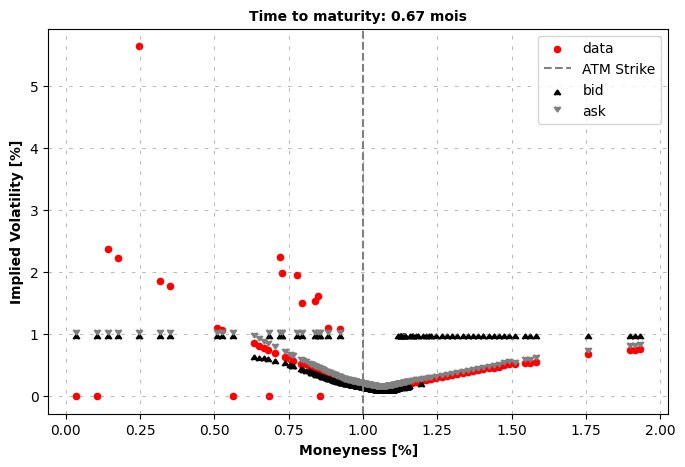

In [7]:
time_to_maturity = full_market_data['Time to Maturity'].iloc[0]
strikes = full_market_data['Strike'].values
bid_prices = full_market_data["Bid"].values
ask_prices = full_market_data['Ask'].values
market_ivs = full_market_data['Implied Volatility'].values
market_prices = full_market_data['Call Price'].values

marketVolatilitySmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_ivs=market_ivs,
    r=r
)
marketVolatilitySmile.plot(bid_prices=bid_prices, ask_prices=ask_prices)

la iv du marché fait pas trop de sens, plutot utiliser $$\frac{\sigma_{bid}+\sigma_{ask}}{2}$$

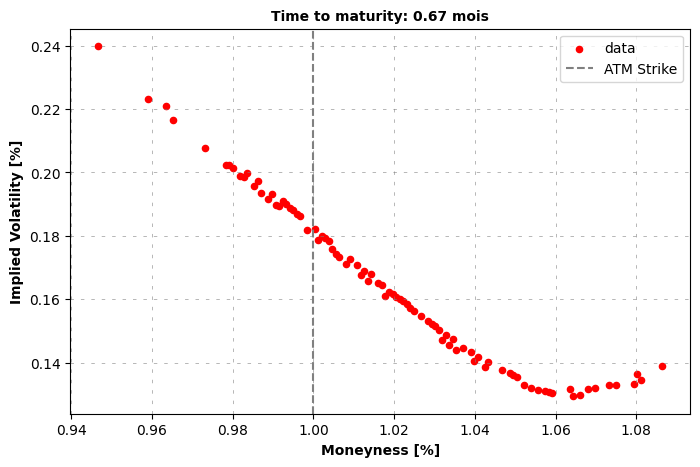

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity,Mid ivs,Ask ivs,Bid ivs,Mid Price
77,241.80,327.90,334.20,0.245087,5390.0,16.0,0.055556,2025-04-17,0.239809,0.249484,0.230134,331.050
86,225.93,268.00,269.60,0.221188,5460.0,10.0,0.055556,2025-04-17,0.223061,0.225157,0.220965,268.800
90,242.31,246.10,251.50,0.223572,5485.0,10.0,0.055556,2025-04-17,0.220933,0.227575,0.214290,248.800
92,173.00,238.70,240.30,0.214714,5495.0,26.0,0.055556,2025-04-17,0.216624,0.218560,0.214689,239.500
101,182.50,202.10,203.70,0.205662,5540.0,10.0,0.055556,2025-04-17,0.207570,0.209340,0.205800,202.900
...,...,...,...,...,...,...,...,...,...,...,...,...
217,1.10,0.60,0.75,0.132699,6120.0,15.0,0.055556,2025-04-17,0.133135,0.135051,0.131219,0.675
222,1.85,0.35,0.60,0.135263,6145.0,50.0,0.055556,2025-04-17,0.133351,0.137633,0.129069,0.475
223,0.71,0.45,0.60,0.136483,6150.0,13.0,0.055556,2025-04-17,0.136522,0.138909,0.134134,0.525
224,1.55,0.30,0.60,0.137765,6155.0,300.0,0.055556,2025-04-17,0.134713,0.140182,0.129245,0.450


In [8]:
market_data = marketVolatilitySmile.filters(full_market_data)
marketVolatilitySmile.plot()
market_data

Calibrated parameters: v0=0.033 | kappa=10.000 | theta=0.031 | sigma=0.789 | rho=-0.761



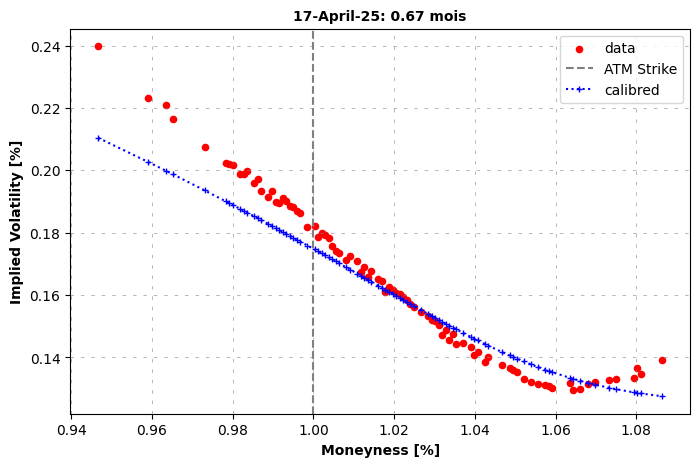

{'vol_initial': np.float64(0.03315895241855199),
 'kappa': np.float64(10.0),
 'theta': np.float64(0.031086927628855933),
 'sigma': np.float64(0.7885040290547944),
 'rho': np.float64(-0.7611549857465385),
 'drift_emm': 0}

In [9]:
params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.8,
}
heston = Heston(spot=spot, r=r, **params)

initial_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=[params['kappa'], params['theta'], params['sigma'], params['rho']],
    speed='local',
    method='SLSQP',
    relative_errors='True'
)

# calibrated_params = marketVolatilitySmile.calibration(
#     price_function=heston.call_price,
#     guess_correlation_sign='negative',
#     initial_guess=[initial_params['kappa'], initial_params['theta'], initial_params['sigma'], initial_params['rho']],
#     weights=market_data['Volume'],
#     power='mae',
#     speed='global',
# )
calibrated_params=initial_params

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params),
    maturity=maturity
)
calibrated_params

# SVI

['success condition satisfied'] True


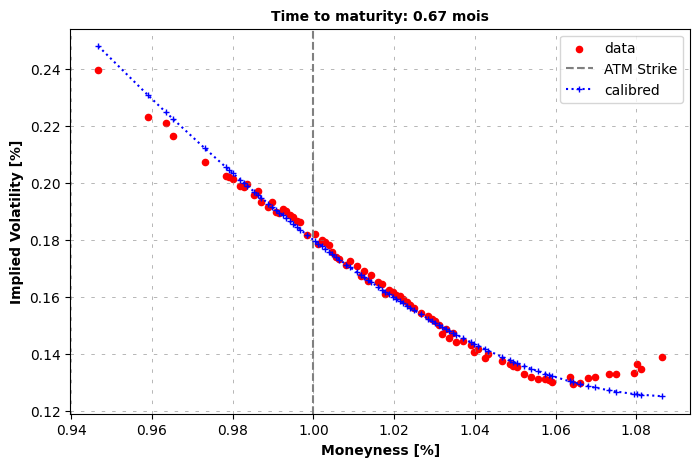

In [10]:
calibrated_params, raw_svi_ivs = marketVolatilitySmile.svi_smooth(select_svi_ivs=False)
marketVolatilitySmile.plot(raw_svi_ivs)

['success condition satisfied'] True


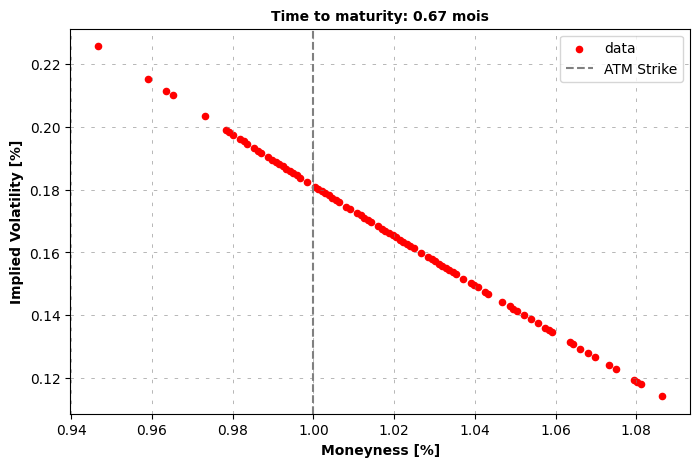

Initial Parameters: kappa=1.250 | theta=0.060 | sigma=0.060 | rho=-0.800

at minimum 27.508676 accepted 1
Parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776

at minimum 27.508676 accepted 1
Parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776

at minimum 33.738099 accepted 1
Parameters: v0=0.033 | kappa=0.074 | theta=2.406 | sigma=1.018 | rho=-0.776

at minimum 27.508676 accepted 1
Parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776

at minimum 27.508676 accepted 1
Parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776

at minimum 27.508676 accepted 1
Parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776

['success condition satisfied'] True
Calibrated parameters: v0=0.033 | kappa=10.000 | theta=0.055 | sigma=1.274 | rho=-0.776



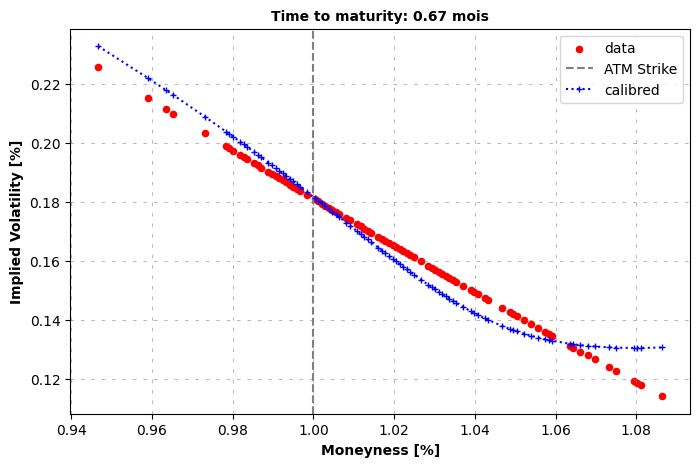

{'vol_initial': np.float64(0.03274795265731334),
 'kappa': np.float64(10.0),
 'theta': np.float64(0.05545626701226739),
 'sigma': np.float64(1.2740587333196853),
 'rho': np.float64(-0.7759594922321987),
 'drift_emm': 0}

In [11]:
calibrated_params, raw_svi_ivs = marketVolatilitySmile.svi_smooth(select_svi_ivs=True)
marketVolatilitySmile.plot()

params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
heston = Heston(spot=spot, r=r, **params)

calibrated_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=[1.25, 0.06, 0.06, -0.8],
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params)
)
calibrated_params